In [1]:
import torch
from torch.utils.data import Dataset    # Dataset读取单个样本的抽象类，包括读取样本的标签、样本的索引、样本的特征
from torch.utils.data import DataLoader   # 数据加载器，组合数据集和采样器，并在数据集上提供单进程或多进程迭代器
from torchvision import datasets    # torchvision是PyTorch中专门用于图像处理的库,datasets是其中的数据集模块
from torchvision.transforms import ToTensor

from torch.nn import functional as F
from torch import nn, optim

import matplotlib.pyplot as plt

In [2]:
def plot_curve(data):
    """
    下降曲线的绘制
    :param data:
    :return:
    """
    fig = plt.figure()
    plt.plot(range(len(data)), data, color='blue')  #
    plt.legend(['value'], loc='upper right')
    plt.xlabel('step')
    plt.ylabel('value')
    plt.show()


def plot_image(img, label, name):
    fig = plt.figure()
    labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
    for i in range(6):
        plt.subplot(2, 3, i + 1)    # 2行3列,i+1表示第几个子图
        plt.tight_layout()  # 调整子图间距
        plt.imshow(img[i][0] * 0.3081 + 0.1307, cmap='gray', interpolation='none')  
        plt.title("{}: {}".format(name, labels_map[label[i].item()]))  
        plt.xticks([])  # 不显示x轴
        plt.yticks([])  # 不显示y轴
    plt.show()


def one_hot(label, depth=10):
    """
    one_hot编码
    :param label:
    :param depth:
    :return:
    """
    out = torch.zeros(label.size(0), depth)
    idx = torch.LongTensor(label).view(-1, 1)
    out.scatter_(dim=1, index=idx, value=1)
    return out


In [3]:
def load_dataset():
    #从torchversion加载自带数据集
    training_data = datasets.FashionMNIST(
    root="FashionMNISTdata",    # 数据集存放路径
    train=True,    # 是否为训练集
    download=True,    # 是否下载
    transform=ToTensor(),    # 数据转换方式
    # transform=torchvision.transforms.Compose([  # 数据转换方式
    #     torchvision.transforms.ToTensor(),  # 将PIL.Image或numpy.ndarray转换为torch.FloatTensor，并归一化到[0,1]
    #     torchvision.transforms.Normalize(   # 标准化，均值为0，标准差为1
    #         (0.1307,), (0.3081,))   # 均值和标准差
    # ])
    )
    train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)    # DataLoader是一个迭代器，每次返回一个batch的数据
    test_data = datasets.FashionMNIST(
        root="FashionMNISTdata",
        train=False,
        download=True,
        transform=ToTensor()
    )
    

    test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)  
    return train_dataloader, test_dataloader
    


In [4]:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # xw + b
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # x: [b, 1, 28, 28]
        # h1 = relu(xw1 + b)
        x = F.relu(self.fc1(x))
        # h2 = relu(h1w2 + b2)
        x = F.relu(self.fc2(x))
        # h3 = h2w3 + b3
        x = self.fc3(x)

        return x

## 1-定义一个Net_SoftMax网络
 super(Net_SoftMax, self).__init__()

## 3-损失函数换成交叉熵

In [5]:
def train(epoch_num, train_loader, net, optimizer):
    train_loss = []
    for epoch in range(epoch_num):
        for batch_idx, (x, y) in enumerate(train_loader):
            #############################3 x，y也放入cuda
            x=x.to(device)
            y=y.to(device)

            # x: [b, 1, 28, 28], y: [512]
            # [b, 1, 28, 28] => [b, feature]
            x = x.view(x.size(0), 28 * 28)
            # => [b, 10]
            out = net(x)
            # y_onehot = one_hot(y) # [b] => [b, 10]
            y_onehot = F.one_hot(y, 10).float()
            # loss = mse(out, y_onehot)
            # loss = F.mse_loss(out, y_onehot)    #test acc: 0.8554
            # loss = F.mse_loss(out, y)  
            loss = F.cross_entropy(out, y)   

            optimizer.zero_grad()
            loss.backward()
            # w' = w - lr * grad
            optimizer.step()

            train_loss.append(loss.item())

            if batch_idx % 100 == 0:
                print('epoch {}, batch_idx {}, loss {}'.format(epoch, batch_idx, loss.item()))

    return train_loss

## 2-将小net继承Net_SoftMax（）

没换之前test acc: 0.8554


后：test acc: 0.8775


Using cuda device
torch.Size([64, 1, 28, 28]) torch.Size([64]) tensor(0.) tensor(1.)


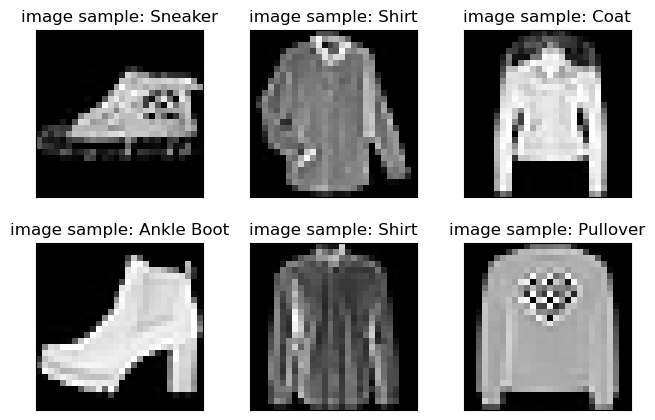

epoch 0, batch_idx 0, loss 2.2995452880859375
epoch 0, batch_idx 100, loss 0.9048411250114441
epoch 0, batch_idx 200, loss 0.8357951641082764
epoch 0, batch_idx 300, loss 0.537168025970459
epoch 0, batch_idx 400, loss 0.5428003072738647
epoch 0, batch_idx 500, loss 0.6392250657081604
epoch 0, batch_idx 600, loss 0.4871872067451477
epoch 0, batch_idx 700, loss 0.3203714191913605
epoch 0, batch_idx 800, loss 0.5150865912437439
epoch 0, batch_idx 900, loss 0.619549572467804
epoch 1, batch_idx 0, loss 0.35014718770980835
epoch 1, batch_idx 100, loss 0.4101036787033081
epoch 1, batch_idx 200, loss 0.6947115063667297
epoch 1, batch_idx 300, loss 0.4348907172679901
epoch 1, batch_idx 400, loss 0.3372291624546051
epoch 1, batch_idx 500, loss 0.4892473816871643
epoch 1, batch_idx 600, loss 0.3562239110469818
epoch 1, batch_idx 700, loss 0.2384330779314041
epoch 1, batch_idx 800, loss 0.2874871790409088
epoch 1, batch_idx 900, loss 0.38546520471572876
epoch 2, batch_idx 0, loss 0.269263714551925

In [6]:
########################1调用cuda
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

train_loader, test_loader = load_dataset()
x, y = next(iter(train_loader)) # 取出一个batch的数据
print(x.shape, y.shape, x.min(), x.max())
plot_image(x, y, "image sample")

# net = Net() #调用Net类

#####################2网络放入cuda（3）在net（）
net=Net().to(device)
# net=Net_SoftMax().to(device)    #在网络最后一层用softmax


# [w1, b1, w2, b2, w3, b3]
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)  #定义优化器

epoch_num = 10   #训练次数1
train_loss = train(epoch_num, train_loader, net, optimizer) #训练返回loss

plot_curve(train_loss)  #绘制下降曲线
# 得到参数[w1, b1, w2, b2, w3, b3]

total_correct = 0   #初始化一个变量，用于记录正确的个数
for x, y in test_loader:
    x=x.to(device)
    y=y.to(device)
    x = x.view(x.size(0), 28 * 28)
    out = net(x)
    # out: [b, 10] => pred: [b]
    pred = out.argmax(dim=1)    #返回最大值的索引
    correct = pred.eq(y).sum().float().item()   #计算正确的个数，eq()比较两个tensor是否相等，sum()求和，float()转换为浮点数，item()返回元素值
    total_correct += correct    #累加正确的个数

total_num = len(test_loader.dataset)    #测试集的总数
acc = total_correct / total_num #计算准确率
print('test acc:', acc)


x, y = next(iter(test_loader))  #取出一个batch的数据，iter()返回一个迭代器，next()返回迭代器的下一个项目？？
####################4  测试用的数据也需要去调用cuda推理
x=x.to(device)
y=y.to(device)
out = net(x.view(x.size(0), 28 * 28))   #预测，此时out是一个tensor，存储的是一组预测值，每个值是一个10维的向量
pred = out.argmax(dim=1)    #取出预测值中最大的索引，即预测的类别
####################5  取出来画图
x=x.to('cpu')
pred=pred.to('cpu')
plot_image(x, pred, 'test') #绘制图像


## 作业
训练cifar10。一共包含10 个类别的RGB 彩色图片：飞机（ airplane ）、汽车（ automobile ）、鸟类（ bird ）、猫（ cat ）、鹿（ deer ）、狗（ dog ）、蛙类（ frog ）、马（ horse ）、船（ ship ）和卡车（ truck ）。每个图片的尺寸为32 × 32 ，每个类别有6000个图像，数据集中一共有50000 张训练图片和10000 张测试图片。
修改网络输入维度即可训练，调整超参数使得精度达到较高水平。
